<a href="https://colab.research.google.com/github/waraporn19/data_viz/blob/main/Pandas102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd #เรียกใช้ packet ชื่อว่า pandas แล้วเปลี่ยนเป็น pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# เรียกใช้ฟังก์ชั่น os  คือเรียกไฟล์ ชี้ไฟล์
import os
path = '/content/drive/My Drive/Dataviz_2021'#ให้ข้อมูลที่อยู่ใน Drive แทนด้วยชื่อ path

In [5]:

covid_file_path = os.path.join(path,'pm-18-jan-2021.csv')
print(covid_file_path)

/content/drive/My Drive/Dataviz_2021/pm-18-jan-2021.csv


In [6]:
data_covid = pd.read_csv(covid_file_path)
data_covid

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
...,...,...,...,...,...,...,...,...,...,...
12418,12419,1/18/2021,1/17/2021,หญิง,28.0,Thailand,สมุทรปราการ,สมุทรปราการ,เมือง,สถานบันเทิง
12419,12420,1/18/2021,1/17/2021,หญิง,27.0,Thailand,สมุทรปราการ,สมุทรปราการ,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
12420,12421,1/18/2021,1/17/2021,ชาย,10.0,Thailand,ชลบุรี,ชลบุรี,สัตหีบ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
12421,12422,1/18/2021,1/17/2021,ชาย,52.0,Thailand,ชลบุรี,ชลบุรี,ศรีราชา,Cluster ชลบุรี โรงเบียร์ 90


In [ ]:
data_covid.shape

(12423, 10)

#.isnull()
.isnull() ข้อมูลต้องเป็น array

In [ ]:
data_covid.isnull()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,False,False,True,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
12418,False,False,False,False,False,False,False,False,False,False
12419,False,False,False,False,False,False,False,False,False,False
12420,False,False,False,False,False,False,False,False,False,False
12421,False,False,False,False,False,False,False,False,False,False


#.any()เอาค่าความจริงในแต่ละ column ทุกค่ามา or กัน
.all() เอาค่าความจริงภายในแต่ละ column มา AND กัน

In [ ]:
data_covid.isnull().any()  #ได้

No.                      False
announce_date            False
notification_date         True
sex                       True
age                       True
nationality               True
province_of_isolation     True
province_of_onset         True
district_of_onset         True
risk                      True
dtype: bool

In [ ]:
data_covid.isnull().all()

No.                      False
announce_date            False
notification_date        False
sex                      False
age                      False
nationality              False
province_of_isolation    False
province_of_onset        False
district_of_onset        False
risk                     False
dtype: bool

In [ ]:
# data_covid.iloc[0,0].isnull()  #ใช้ .isnull() ไม่ได้ ข้อมูลต้องเป็น array

In [ ]:
data_covid['No.'][0].isnull()  #อันนี้เป็นการชี้ของ pandas

ต้องใช้วิธีตัดตาราง

In [ ]:
data_covid.iloc[:1,0].isnull()

0    False
Name: No., dtype: bool

#การต่อตาราง ในแนวแกน x แกน y
- ต่อแกน y คือ เพิ่ม records (เพิ่มจำนวนข้อมูล)
- ต่อแกน x คือ เพิ่ม record (เพิ่มรายละเอียดของข้อมูล)

#ต่อแกน Y pd.concat()

In [ ]:
data_covid['province_of_onset']=='ขอนแก่น'

0        False
1        False
2        False
3        False
4        False
         ...  
12418    False
12419    False
12420    False
12421    False
12422    False
Name: province_of_onset, Length: 12423, dtype: bool

In [ ]:
dataKK = data_covid[data_covid['province_of_onset']=='ขอนแก่น']  # จะได้ list ของ T F
dataKK.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
180,181,3/18/2020,3/15/2020,ชาย,33.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สนามมวย
462,463,3/22/2020,3/21/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1466,1467,3/30/2020,3/26/2020,ชาย,19.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,คนไทยเดินทางกลับจากต่างประเทศ
1970,1971,4/3/2020,3/31/2020,หญิง,70.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว
2637,2638,4/15/2020,4/14/2020,หญิง,63.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสผู้เดินทางจากต่างประเทศ


In [ ]:
dataUD = data_covid[data_covid['province_of_onset']=='อุดรธานี']  # จะได้ list ของ T F
dataUD.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
424,425,3/22/2020,3/21/2020,ชาย,33.0,Thailand,อุดรธานี,อุดรธานี,กุดจับ,สนามมวย
434,435,3/22/2020,3/20/2020,หญิง,47.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สถานบันเทิง
471,472,3/22/2020,3/22/2020,หญิง,26.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
883,884,3/25/2020,3/24/2020,ชาย,25.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สถานบันเทิง
885,886,3/25/2020,3/24/2020,หญิง,20.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


In [ ]:
dataMS = data_covid[data_covid['province_of_onset']=='มหาสารคาม']  # จะได้ list ของ T F
dataMS.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
346,347,3/21/2020,3/20/2020,ชาย,34.0,Thailand,นนทบุรี,มหาสารคาม,เชียงยืน,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
789,790,3/24/2020,3/28/2020,ชาย,48.0,Thailand,มหาสารคาม,มหาสารคาม,พยัคฆภูมิพิสัย,สถานบันเทิง
6690,6691,12/31/2020,12/30/2020,หญิง,42.0,Thailand,มหาสารคาม,มหาสารคาม,บรบือ,Cluster สมุทรสาคร
10802,10803,1/12/2021,1/11/2021,หญิง,25.0,Thailand,สมุทรสาคร,มหาสารคาม,วาปีปทุม,Cluster สมุทรสาคร


In [ ]:
dataMYisan = pd.concat([dataKK,dataUD,dataMS])
dataMYisan

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
180,181,3/18/2020,3/15/2020,ชาย,33.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สนามมวย
462,463,3/22/2020,3/21/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1466,1467,3/30/2020,3/26/2020,ชาย,19.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,คนไทยเดินทางกลับจากต่างประเทศ
1970,1971,4/3/2020,3/31/2020,หญิง,70.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว
2637,2638,4/15/2020,4/14/2020,หญิง,63.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสผู้เดินทางจากต่างประเทศ
2673,2674,4/17/2020,4/16/2020,ชาย,68.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
5948,5949,12/26/2020,12/25/2020,หญิง,32.0,Thailand,ขอนแก่น,ขอนแก่น,แวงใหญ่,Cluster สมุทรสาคร
6082,6083,12/27/2020,12/26/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,แวงใหญ่,Cluster สมุทรสาคร
9333,9334,1/7/2021,1/6/2021,ชาย,17.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,อยู่ระหว่างการสอบสวน
9334,9335,1/7/2021,1/6/2021,ชาย,20.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


#ต่อแกน X
- จับ 2 ตารางมาต่อกันเลย .merge
- เลือกมาเพิ่มเฉพาะบางคอลัมน์ .map

In [ ]:
data_province = data_covid[['No.','announce_date','province_of_onset']] # สร้างตารางใหม่
data_province

,No.,announce_date,province_of_onset
0,1,1/12/2020,กรุงเทพมหานคร
1,2,1/17/2020,กรุงเทพมหานคร
2,3,1/22/2020,นครปฐม
3,4,1/22/2020,กรุงเทพมหานคร
4,5,1/24/2020,กรุงเทพมหานคร
...,...,...,...
12418,12419,1/18/2021,สมุทรปราการ
12419,12420,1/18/2021,สมุทรปราการ
12420,12421,1/18/2021,ชลบุรี
12421,12422,1/18/2021,ชลบุรี


In [ ]:
data_human = data_covid[['No.','sex','age','nationality']]
data_human

,No.,sex,age,nationality
0,1,หญิง,61.0,China
1,2,หญิง,74.0,China
2,3,หญิง,73.0,Thailand
3,4,ชาย,68.0,China
4,5,หญิง,66.0,China
...,...,...,...,...
12418,12419,หญิง,28.0,Thailand
12419,12420,หญิง,27.0,Thailand
12420,12421,ชาย,10.0,Thailand
12421,12422,ชาย,52.0,Thailand


แบบง่าย รู้ว่า 2 ตาราง record ตรงกัน

In [ ]:
full_table1 = data_human.merge(data_province)#ก่อน marge ตารางจะอยู่ด้านซ้าย  เมื่อ  merge จะทำให้ตารางอยู่ด้านขวา
full_table1#การที่ตารางสามารถรวมได้เลยโดยไม่ต้องกำหนด key เพราะว่า 2 ตาราง record ตรงกัน ทำให้รวมกันได้เลย

,No.,sex,age,nationality,announce_date,province_of_onset
0,1,หญิง,61.0,China,1/12/2020,กรุงเทพมหานคร
1,2,หญิง,74.0,China,1/17/2020,กรุงเทพมหานคร
2,3,หญิง,73.0,Thailand,1/22/2020,นครปฐม
3,4,ชาย,68.0,China,1/22/2020,กรุงเทพมหานคร
4,5,หญิง,66.0,China,1/24/2020,กรุงเทพมหานคร
...,...,...,...,...,...,...
12418,12419,หญิง,28.0,Thailand,1/18/2021,สมุทรปราการ
12419,12420,หญิง,27.0,Thailand,1/18/2021,สมุทรปราการ
12420,12421,ชาย,10.0,Thailand,1/18/2021,ชลบุรี
12421,12422,ชาย,52.0,Thailand,1/18/2021,ชลบุรี


sort

In [ ]:
data_human2 = data_human.sort_values('age') # ทำการเรียงตาม อายุ จาก น้อย -> มาก
data_human2

,No.,sex,age,nationality
6477,6478,หญิง,0.0,Thailand
1987,1988,ชาย,0.0,Thailand
1675,1676,ชาย,0.0,Japan
1075,1076,ชาย,0.0,Thailand
300,301,ชาย,0.0,Thailand
...,...,...,...,...
12405,12406,NaN,NaN,NaN
12406,12407,NaN,NaN,NaN
12407,12408,NaN,NaN,NaN
12408,12409,NaN,NaN,NaN


.merge

In [ ]:
full_table2 = data_human2.merge(data_province) #ซ้าย merge ต่อด้วย ขวา
full_table2.head()

,No.,sex,age,nationality,announce_date,province_of_onset
0,6478,หญิง,0.0,Thailand,12/30/2020,เพชรบุรี
1,1988,ชาย,0.0,Thailand,4/4/2020,ระยอง
2,1676,ชาย,0.0,Japan,4/1/2020,กรุงเทพมหานคร
3,1076,ชาย,0.0,Thailand,3/27/2020,สุราษฎร์ธานี
4,301,ชาย,0.0,Thailand,3/20/2020,ภูเก็ต


In [ ]:
data_covid[1987:1988]  # เช็ค ว่าต่อกันถูกต้องรึป่าว

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
1987,1988,4/4/2020,4/3/2020,ชาย,0.0,Thailand,ระยอง,ระยอง,บ้านฉาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


In [ ]:
data_human2_renamed = data_human2.rename(columns={'No.': 'patientNumber'})  # เปลี่ยนชื่อ column ที่ชื่อ 'No.' ให้เป็นชื่อ  'patientNumber'
data_human2_renamed.head()

,patientNumber,sex,age,nationality
6477,6478,หญิง,0.0,Thailand
1987,1988,ชาย,0.0,Thailand
1675,1676,ชาย,0.0,Japan
1075,1076,ชาย,0.0,Thailand
300,301,ชาย,0.0,Thailand



data_human2_renamed.merge(data_province)

จะเกิด error เพราะมีหัวตารางที่ไม่เหมือนกันทำให้เชื่อมกันไม่ได้

In [ ]:
full_table3 = data_human2_renamed.merge(data_province,left_on='patientNumber',right_on='No.') # มีคีย์ เป็นตัวเชื่อม
full_table3.head()

,patientNumber,sex,age,nationality,No.,announce_date,province_of_onset
0,6478,หญิง,0.0,Thailand,6478,12/30/2020,เพชรบุรี
1,1988,ชาย,0.0,Thailand,1988,4/4/2020,ระยอง
2,1676,ชาย,0.0,Japan,1676,4/1/2020,กรุงเทพมหานคร
3,1076,ชาย,0.0,Thailand,1076,3/27/2020,สุราษฎร์ธานี
4,301,ชาย,0.0,Thailand,301,3/20/2020,ภูเก็ต


#map() เลือกมาเฉพาะบาง column มาแปะเพิ่มเข้าไป
คุณสมบัติของ pandas ก็คือเราสามารถสร้าง column ใหม่ให้ตาราง df ได้ โดย

df['ชื่อ column ใหม่'] = (list ที่มีจำนวนสมาชิกเท่ากับจำนวน record ของ df)

In [ ]:
data_human2_renamed.head()

,patientNumber,sex,age,nationality
6477,6478,หญิง,0.0,Thailand
1987,1988,ชาย,0.0,Thailand
1675,1676,ชาย,0.0,Japan
1075,1076,ชาย,0.0,Thailand
300,301,ชาย,0.0,Thailand


In [ ]:
data_human2_renamed['patientNumber'].map(data_covid.set_index('No.')['risk']) 
#.map จะผูกค่า(เรียงให้ตรงกัน) 'patientNumber' กับ 'No.' เข้าด้วยกันแล้ว return ค่า 'risk' ออกมา

#เพิ่ม column
จากตาราง data_human2_renamed เพิ่ม column ['num'] เข้าไป ค่าที่ถูกนำไปใส่ คือ range(0-ตัวเลขก่อนหน้า) ของจำนวน 'แถว' ของ data_human2_renamed

In [ ]:
data_human2_renamed['num'] = range(data_human2_renamed.shape[0])
data_human2_renamed

,patientNumber,sex,age,nationality,num
6477,6478,หญิง,0.0,Thailand,0
1987,1988,ชาย,0.0,Thailand,1
1675,1676,ชาย,0.0,Japan,2
1075,1076,ชาย,0.0,Thailand,3
300,301,ชาย,0.0,Thailand,4
...,...,...,...,...,...
12405,12406,NaN,NaN,NaN,12418
12406,12407,NaN,NaN,NaN,12419
12407,12408,NaN,NaN,NaN,12420
12408,12409,NaN,NaN,NaN,12421


ลำดับที่อยู่ใน 'patientNumber' ให้เป็นลำดับเดียวกับ 'No.' ที่อยู่ใน data_covid แล้วในลำดับนั้นเนี่ย ให้เอาค่าที่อยู่ใน column ชื่อ 'risk' มา

In [ ]:
data_human2_renamed['patientNumber'].map(data_covid.set_index('No.')['risk']) #.map มันจะ ผูกค่า 'patientNumber' กับ 'No.' เข้าด้วยกัน แล้ว return list ของค่า ['risk']

6477     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1987     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1675     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1075     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
300      สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
                            ...                     
12405                              Cluster สมุทรสาคร
12406                              Cluster สมุทรสาคร
12407                              Cluster สมุทรสาคร
12408                              Cluster สมุทรสาคร
12409                              Cluster สมุทรสาคร
Name: patientNumber, Length: 12423, dtype: object

In [ ]:
data_human2_renamed['detail'] = data_human2_renamed['patientNumber'].map(data_covid.set_index('No.')['risk'])
data_human2_renamed#เอาตารางหลักมาสร้าง columns ใหม่ โดยจะดึงหัวตารางที่ชื่อว่า 'patientNumber' 
#แล้ว .map กับตาราง data_covid ที่ใช้ 'No.' เชื่อมแล้วดึงค่า 'risk' มาด้วย

,patientNumber,sex,age,nationality,num,detail
6477,6478,หญิง,0.0,Thailand,0,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1987,1988,ชาย,0.0,Thailand,1,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1675,1676,ชาย,0.0,Japan,2,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1075,1076,ชาย,0.0,Thailand,3,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
300,301,ชาย,0.0,Thailand,4,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
...,...,...,...,...,...,...
12405,12406,NaN,NaN,NaN,12418,Cluster สมุทรสาคร
12406,12407,NaN,NaN,NaN,12419,Cluster สมุทรสาคร
12407,12408,NaN,NaN,NaN,12420,Cluster สมุทรสาคร
12408,12409,NaN,NaN,NaN,12421,Cluster สมุทรสาคร


#HW7 สร้างตารางใหม่ ที่ค่าใน sex เป็น missing ทั้งหมด
สรุปว่าทำไม record นั้นๆ ถึงเป็น missing
สรุป ใน 100% มีกี่เปอร์เซ็นที่มาจาก.....

In [7]:
data_covid.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


In [8]:
sex_missing = data_covid.fillna(value={'sex':'missing'}) #เติมค่า missing ไปแทนที่ค่าของ 0 หรือ none ใน column sex 
sex_missing.head()  
#ค่า missing ที่เกิดขึ้นใน column sex อาจจะเกิดขึ้นเพราะไม่มีการระบุเพศของผู้ป่วยให้ครบถ้วนหรือมีการตกหล่นของข้อมูล

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


In [9]:
sex_missing2 = sex_missing[sex_missing['sex']=='missing'] #ดูค่าที่มี sex เป็น missing ทั้งหมดว่ามีกี่ตัว
sex_missing2.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
4391,4392,12/20/2020,NaN,missing,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4392,4393,12/20/2020,NaN,missing,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4393,4394,12/20/2020,NaN,missing,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4394,4395,12/20/2020,NaN,missing,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4395,4396,12/20/2020,NaN,missing,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร


In [10]:
sex_missing2.columns

Index(['No.', 'announce_date', 'notification_date', 'sex', 'age',
       'nationality', 'province_of_isolation', 'province_of_onset',
       'district_of_onset', 'risk'],
      dtype='object')

In [11]:
#สร้างตารางใหม่ชื่อ New_dataCo โดยเลือกเฉพาะ column ที่ต้องการ
New_dataCo = sex_missing2[["nationality","province_of_isolation","province_of_onset","risk"]] 
New_dataCo.head()

,nationality,province_of_isolation,province_of_onset,risk
4391,Burma,สมุทรสาคร,สมุทรสาคร,Cluster สมุทรสาคร
4392,Burma,สมุทรสาคร,สมุทรสาคร,Cluster สมุทรสาคร
4393,Burma,สมุทรสาคร,สมุทรสาคร,Cluster สมุทรสาคร
4394,Burma,สมุทรสาคร,สมุทรสาคร,Cluster สมุทรสาคร
4395,Burma,สมุทรสาคร,สมุทรสาคร,Cluster สมุทรสาคร


##วิธีโดยไม่ใช้ .groupby . count()
คือดูขนาดของ column นั้นๆเลยที่ต้องการรู้แต่ค่าที่ต้องการรู้นั้นเราจะต้องรูชื่อตัวแปรนั้นๆด้วย 
เช่น 'nationality' ต้องรู้ว่ามี Burma, Thai, Cambodia

In [13]:
New_dataCo.shape

(2497, 4)

In [14]:
New_dataCo[New_dataCo['nationality']=='Burma'].shape

(1366, 4)

In [16]:
New_dataCo[New_dataCo['nationality']=='Thai'].shape

(0, 4)

In [17]:
New_dataCo[New_dataCo['nationality']=='Cambodia'].shape

(61, 4)

In [18]:
#.groupby ตารางใหม่ที่ได้ 
New_dataCo.groupby('nationality').count()

,province_of_isolation,province_of_onset,risk
nationality,,,
Burma,1366,1349,1366
Cambodia,61,0,61
Thailand,46,22,31



จากตาราง sex_missing  เป็นข้อมูลผู้ป่วยที่ไม่ทราบ เพศ จะเห็นได้ว่ากว่าครึ่งหนึ่งของข้อมูลทั้งหมด เป็นผู้ป่วยที่มีสัญชาติ Burma และ ส่วนใหญ่เริ่มมีอาการที่จังหวัด สมุทรสาคร

จากข้อมูลดังกล่าวสามารถอธิบายได้ว่า ข้อมูลเป็น missing เพราะว่าเป็น ช่วงที่พบผู้ติดเชื้อพร้อมกันเป็นจำนวนมากและเป็นแรงงานต่างด้าวอยู่ในพื้นที่จังหวัดสมุทรสาคร ก็เลยทำให้การบันทึกข้อมูลเป็นไปได้ยาก

#.groupby()

In [19]:
data_covid.groupby('nationality').count()

,No.,announce_date,notification_date,sex,age,province_of_isolation,province_of_onset,district_of_onset,risk
nationality,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1
Albania,3,3,3,3,3,3,3,2,3
American,1,1,1,1,1,1,1,1,1
American,1,1,1,1,1,1,1,1,1
American Samoa,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
deutsch,1,1,1,1,1,1,1,1,1
thailand,2,2,2,2,2,2,2,2,2
ต่างด้าว,21,21,21,21,21,21,21,21,21


In [20]:
data_covid.groupby('nationality')

In [21]:
data_covid.groupby('nationality').max(' ')

,No.,age
nationality,,
Afghanistan,4346,31.0
Albania,3522,51.0
American,3862,39.0
American,3905,46.0
American Samoa,11687,21.0
...,...,...
deutsch,3898,55.0
thailand,6824,57.0
ต่างด้าว,2998,43.0


#เฉลยการบ้าน

In [22]:
dataMiss = data_covid[data_covid['sex'].isnull()]  
dataMiss

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
4391,4392,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4392,4393,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4393,4394,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4394,4395,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4395,4396,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
...,...,...,...,...,...,...,...,...,...,...
12405,12406,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12406,12407,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12407,12408,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12408,12409,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร


In [23]:
dataMiss.groupby('nationality').describe()

No.                                   ...   age                  
              count         mean         std     min  ...   25%   50%   75%   max
nationality                                           ...                        
Burma        1366.0  5124.517570  472.244857  4392.0  ...   NaN   NaN   NaN   NaN
Cambodia       61.0  6861.278689  275.220828  6543.0  ...   NaN   NaN   NaN   NaN
Thailand       46.0  7295.500000  402.917017  6272.0  ...  28.0  28.0  28.0  28.0

[3 rows x 16 columns]

In [24]:
dataMiss.groupby('province_of_onset').describe()

No.                           ...   age            
                    count         mean         std  ...   50%   75%   max
province_of_onset                                   ...                  
ชลบุรี               18.0  7506.055556    6.637436  ...  28.0  28.0  28.0
ระยอง                 6.0  6289.000000   49.010203  ...   NaN   NaN   NaN
สมุทรสาคร          1353.0  5108.699926  448.936818  ...   NaN   NaN   NaN

[3 rows x 16 columns]

In [25]:
dataMiss.groupby(['province_of_onset', 'nationality' ]).describe()

No.               ...   age      
                                count         mean  ...   75%   max
province_of_onset nationality                       ...            
ชลบุรี            Thailand       18.0  7506.055556  ...  28.0  28.0
ระยอง             Thailand        1.0  6389.000000  ...   NaN   NaN
สมุทรสาคร         Thailand        3.0  6273.000000  ...   NaN   NaN
                  Burma        1349.0  5103.564122  ...   NaN   NaN

[4 rows x 16 columns]

In [26]:
dataMiss_no_burma = dataMiss[dataMiss['nationality']!='Burma' ]
dataMiss_no_burma.groupby('risk').describe()

No.                             ...   age            
                      count          mean          std  ...   50%   75%   max
risk                                                    ...                  
Cluster ชลบุรี         18.0   7506.055556     6.637436  ...  28.0  28.0  28.0
Cluster ระยอง           7.0   6363.285714   201.569437  ...   NaN   NaN   NaN
Cluster สมุทรสาคร     890.0  11417.015730  1231.866699  ...   NaN   NaN   NaN
อยู่ระหว่างการสอบสวน   72.0   6854.111111   269.187068  ...   NaN   NaN   NaN

[4 rows x 16 columns]

In [27]:
dataMiss.groupby('risk').describe()

No.                            ...   age            
                       count         mean          std  ...   50%   75%   max
risk                                                    ...                  
Cluster ชลบุรี          18.0  7506.055556     6.637436  ...  28.0  28.0  28.0
Cluster ระยอง            8.0  6452.250000   313.277946  ...   NaN   NaN   NaN
Cluster สมุทรสาคร     2253.0  7607.873058  3195.070787  ...   NaN   NaN   NaN
อยู่ระหว่างการสอบสวน    74.0  6852.945946   269.058169  ...   NaN   NaN   NaN

[4 rows x 16 columns]

In [28]:
dataMiss


,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
4391,4392,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4392,4393,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4393,4394,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4394,4395,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4395,4396,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
...,...,...,...,...,...,...,...,...,...,...
12405,12406,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12406,12407,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12407,12408,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12408,12409,1/18/2021,1/17/2021,NaN,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร


In [29]:
dataMiss[dataMiss['risk']=='Cluster สมุทรสาคร'].groupby('announce_date').count()

,No.,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
announce_date,,,,,,,,,
1/14/2021,172,172,0,0,0,172,0,0,172
1/17/2021,311,311,0,0,0,311,0,0,311
1/18/2021,269,269,0,0,0,269,0,0,269
1/5/2021,4,4,0,0,0,4,1,1,4
1/7/2021,109,109,0,0,0,109,0,0,109
12/20/2020,516,0,0,0,516,516,516,516,516
12/21/2020,360,0,0,0,360,360,360,360,360
12/22/2020,397,0,0,0,397,397,397,397,397
12/25/2020,35,0,0,0,35,35,35,35,35


#creat pandas table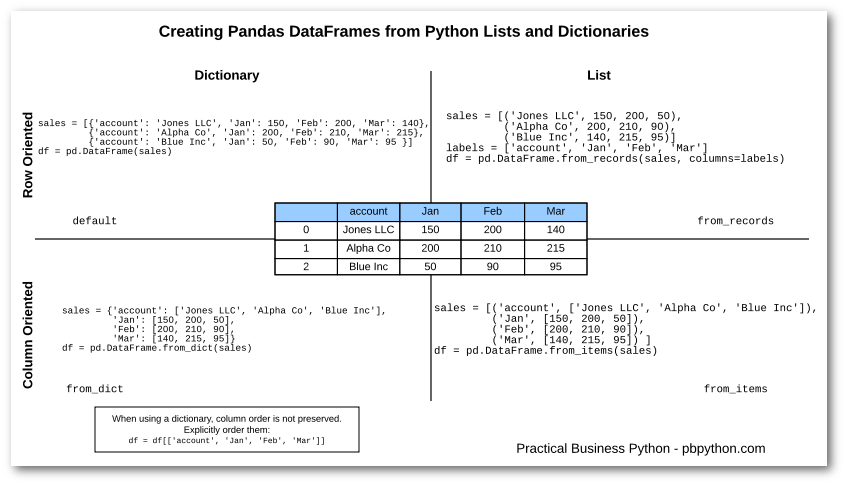

1. สร้าง list records = []
2. ให้ข้างในเป็น dict (คือ {} )แล้วเพิ่ม index ที่เป็นชื่อ column แล้วใส่ค่าลงไป

In [30]:
records = [{  }]

#Simple Visualization

In [31]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df.groupby('Name').count()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


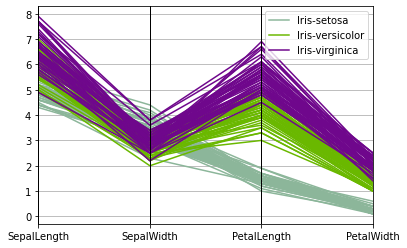

In [33]:
pd.plotting.parallel_coordinates(df,'Name')

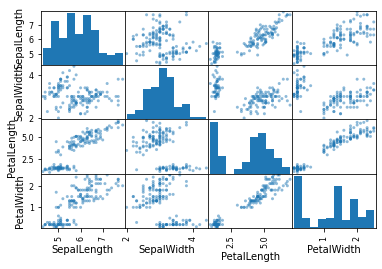

In [34]:
pd.plotting.scatter_matrix(df); #ใส่เพื่อจะได้ไม่มีตัวหนังสือ

#save table

ชื่อตาราง.to_csv('ชื่อไฟล์ที่ต้องการ.csv')

In [35]:
announce_date_count = dataMiss[dataMiss['risk']=='Cluster สมุทรสาคร'].groupby('announce_date').count()
announce_date_count

,No.,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
announce_date,,,,,,,,,
1/14/2021,172,172,0,0,0,172,0,0,172
1/17/2021,311,311,0,0,0,311,0,0,311
1/18/2021,269,269,0,0,0,269,0,0,269
1/5/2021,4,4,0,0,0,4,1,1,4
1/7/2021,109,109,0,0,0,109,0,0,109
12/20/2020,516,0,0,0,516,516,516,516,516
12/21/2020,360,0,0,0,360,360,360,360,360
12/22/2020,397,0,0,0,397,397,397,397,397
12/25/2020,35,0,0,0,35,35,35,35,35



##ชื่อตารางที่ต้องการเซฟ .to_csv(' ชื่อไฟล์ที่ต้องการ save ')

In [36]:
announce_date_count.to_csv('announce_date_count.csv')

##จากนั้น file ที่ save จะไปขึ้นใน colab แล้วจึง download ไปส่ง